In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

## Test Case 0B: P control for an RC Filter


In [8]:
U = pybd.step_input("$U(s)$")

In [9]:
U.place_absolute(0,0)

In [10]:
sum1 = pybd.summing_junction(input1=U,radius=0.35)

In [19]:
sum1.place_relative(U, "right", 3)

In [15]:
P = pybd.P_controller(2, sum1)

In [20]:
P.place_relative(sum1, "right", 3)

In [21]:
analog_sense = pybd.analog_input()

In [22]:
pwm = pybd.pwm_output(5)

In [23]:
G = pybd.plant(analog_sense,pwm,"$G(s)$",P)

In [24]:
G.place_relative(P,"right",5)

In [27]:
sum1.input2 = G

In [28]:
Y = pybd.output_block("$Y(s)$",G)
Y.place_relative(G, "right",6)

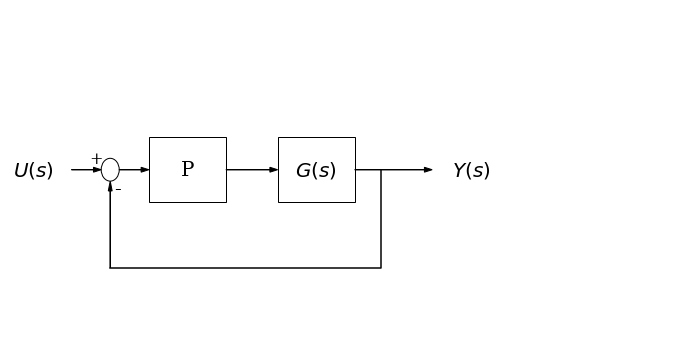

In [29]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram([U,sum1,P,G,Y],ax)
mysys.draw()
plt.xlim([-1,25])
plt.ylim([-5,5])
mysys.axis_off()

## Codegen

In [30]:
msg = "Autogen RC P control code"

In [31]:
mysys.welcome_msg = msg

In [32]:
mysys.get_arduino_init_code()

['step_input u = step_input(0.1, 100);',
 'summing_junction sum1 = summing_junction();',
 'P_control_block P = P_control_block(2);',
 'pwm_output pwm_out = pwm_output(5);',
 'analog_sensor ai_sensor = analog_sensor(A0);',
 'plant G = plant(&pwm_out, &ai_sensor);']

## Note to self:

Right now, a plant block in the Arduino library does not have an input pointer
- the input is passed in explicitly
- this seems fairly inconsistent

In [33]:
template_fn = "arduino_template1.ino"

In [34]:
mysys.generate_arduino_code("autogen0B_RC_P_control", template_fn)

In [35]:
mysys.arduino_file.list

['#include <kraussserial.h>',
 '#include <rtblockdiagram.h>',
 '// both the libraries above need to be installed on student computers',
 '// - what is the most efficient way to accomplish that?',
 '//     - install from zip using the Arduino IDE?',
 '',
 '#define encoderPinA 2',
 '#define squarewave_pin 12',
 'byte inByte;',
 '',
 '// this is the code I am seeking to autogenerate:',
 '/* step_input u = step_input(0.5, 150); */',
 '/* h_bridge_actuator HB = h_bridge_actuator(6, 4, 9);//in1, in2, pwm_pin */',
 '/* encoder enc = encoder(11); */',
 '',
 '/* void enc_isr_wrapper() { */',
 '/*   enc.encoderISR(); */',
 '/* } */',
 '',
 '/* plant G = plant(&HB, &enc); */',
 '/* summing_junction sum1 = summing_junction(&u, &G); */',
 '/* PD_control_block PD = PD_control_block(3, 0.1, &sum1); */',
 '/* saturation_block sat_block = saturation_block(&PD); */',
 '',
 '//bdsysinitcode',
 'step_input u = step_input(0.1, 100);',
 'summing_junction sum1 = summing_junction();',
 'P_control_block P = P_